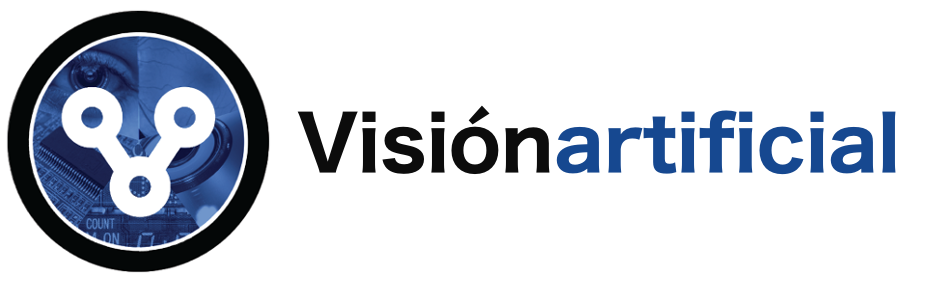

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

# <font style = "color: rgb (50,120,229)"> Convolucion e Filtrado </font>


Neste módulo trataremos os seguintes temas:
    
1. **Convolución e filtrado**
2. **Suavizado media**
3. **Suavizado gaussiano**
4. **Suavizado mediana**
5. **Filtrado bilateral**

<h1 style="font-size:30px;">Convolución e filtrado de imaxes </h1>

No procesamento de imaxes, a convolución é a base de todos os filtros lineais. É o primeiro paso aplicado cando queremos difuminar, afinar ou detectar bordes. E si, é a mesma convolución empregada en redes neuronais de última xeración. Neste caderno, aprenderás o concepto detrás da convolución, a función OpenCV para implementar a convolución e diferentes tipos de filtros.

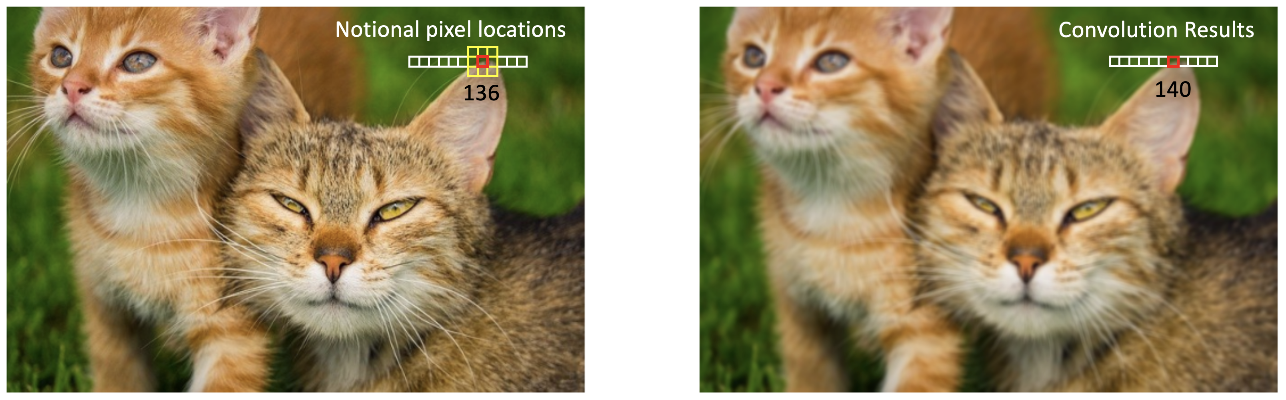






### <font style = "color:rgb(50,120,229)">Convolución</font>



Unha operación de convolución require dúas entradas, a **imaxe de entrada** e un **núcleo**. A imaxe de entrada pode ser en escala de grises ou en cor. Para imaxes en cor, a convolución realízase de forma independente en cada canle. Un núcleo de convolución é unha matriz 2D que se usa para filtrar imaxes, tamén coñecida como **matriz de convolución**. Normalmente é unha matriz cadrada MxN, onde M e N son enteiros impares (por exemplo, 3 × 3, 5 × 5, 7 × 7, ...). O núcleo 3x3 a continuación denomínase núcleo Box. 


$$\frac{1}{9}\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$$

Na maioría dos casos, queremos que a suma dos elementos dun kernel sexa un. Isto garante que a imaxe de saída teña o mesmo nivel de brillo que a imaxe de entrada. Se non facemos isto, os píxeles de saída serán, de media, 9 veces (3x3 = 9) máis brillantes que os píxeles de entrada. Non hai restricións nos valores do kernel, poden ser positivos, negativos, enteiros ou números de coma flotante.

A saída é unha imaxe **filtrada**. O filtrado dunha imaxe de orixe conséguese convolucionando o kernel coa imaxe. En termos sinxelos, a convolución dunha imaxe cun núcleo representa unha operación matemática sinxela, entre o núcleo e os seus elementos correspondentes na imaxe.

### <font style = "color:rgb(50,120,229)">Convolution Workflow</font>

    - Supón que o centro do kernel está posicionado sobre un píxel específico (`p`) nunha imaxe.
    - Multiplica o valor de cada elemento do kernel co elemento píxel correspondente (é dicir, a súa intensidade) na imaxe de orixe.
    - Suma o resultado desas multiplicacións e calcula a media.
    - Substitúe o valor do píxel (` p `), polo valor medio calculado.


### **<font style = "color:rgb(50,120,229)">Nota:</font>** 

O filtrado de convolución descrito anteriormente chámase realmente filtrado de correlación. A correlación e a convolución son exactamente a mesma operación cunha diferenza. En convolución, o kernel xírase 180 graos antes de facer a operación de correlación. Cando o **kernel é simétrico**, a correlación e a convolución son as mesmas. 

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Convolución en OpenCV

En OpenCV, a convolución realízase usando a función  **`filter2D()`**

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Sintaxe da función</font>

```python
dst = cv2.filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]])
```

**`dst`**	imaxe de saída do mesmo tamaño e o mesmo número de canles que src.

A función ten  **3 argumento de entrada requiridos**:

1. **`src`**	imaxe de entrada.
2. **`ddepth`**	profundidade desexada para a imaxe de saida.
3. **`kernel`**	núcleo de convolución (ou máis ben un núcleo de correlación), unha matriz de punto flotante de canle única; se desexase aplicar núcleos diferentes a diferentes canles, divida a imaxe en planos de cor separados usando dividir e procesalos individualmente. 

argumento opcionais:

1. **`anchor`**	áncora do núcleo que indica a posición relativa dun punto filtrado dentro do núcleo; a áncora debería estar dentro do núcleo; o valor predeterminado (-1, -1) significa que a áncora está no centro do núcleo. 
2. **`delta`**	valor opcional engadido aos píxeles filtrados antes de gardalos en dst. 
3. **`borderType`**	método de extrapolación dos píxeles no borde. 

**Nota**: Os parámetros opcionais anteriores case nunca se cambian dos seus valores predeterminados. 

### <font style="color:rgb(8,133,37)">Documentación OpenCV</font>

[**`filter2d()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04)


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

## 1.1 Define un Kernel 

En primeiro lugar, necesitamos definir un núcleo. Para este exercicio, empregemos un tamaño de núcleo de 5x5. Para simplificar as cousas, tamén escolleremos un núcleo onde todos os elementos sexan iguais. Este núcleo adoita denominarse **Box Kernel ou filtro da media**. Ten en conta que cando un núcleo se escribe en forma de matriz como se mostra a continuación, moitas veces multiplícase previamente a matriz por un factor normalizador (neste caso 1/25). Isto fai que sexa un pouco máis doado ler e comprender o núcleo.

$$\frac{1}{25}\begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1\end{bmatrix}$$


In [16]:
kernel_size = 5
# Creamos o kernel a 5*5 con todos os elementos igual a 1.
kernel = np.ones((kernel_size, kernel_size), dtype = np.float32) / kernel_size**2

print (kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


O anterior representa un núcleo normalizado de 5x5 de xeito que todos os valores suman 1.

## 1.2 Realizamos a Convolution 

A continuación, úsase `filter2D ()`para realizar a convolución.

O segundo parámetro (`ddepth`) establécese en `-1`, o que significa que a profundidade de bits da imaxe de saída é a mesma que a imaxe de entrada. Entón, se a imaxe de entrada é do tipo `uint8`, a imaxe de saída tamén será do mesmo tipo.

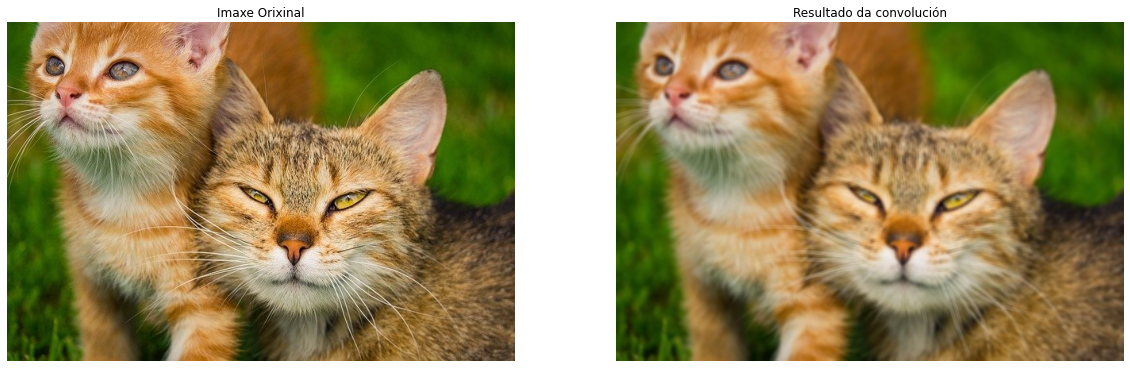

In [17]:
filename = './data/kitten.jpg'
image = cv2.imread(filename)
# Atopei a imaxe?
if image is None:  
    print("Non podo atopar a imaxe")

#Aplicamos a convolución
dst = cv2.filter2D(image, ddepth = -1, kernel = kernel)

#Visualizamos
plt.figure(figsize = [20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(image[:,:,::-1]); plt.title("Imaxe Orixinal");
plt.subplot(122); plt.axis('off'); plt.imshow(dst[:,:,::-1]);   plt.title("Resultado da convolución");

# 2.Filtro da media

No exemplo anterior, vimos como crear un filtro de suavizado cun núcleo 5x5. A versión 3x3 dese núcleo ten este aspecto. 

$$
\frac{1}{9} 
\begin{bmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{bmatrix}
$$

O núcleo pesa a contribución de todos os píxeles do vecindario por igual. Como se mostra no exemplo anterior, podemos crear este núcleo e aplicalo a esta imaxe usando `filter2D ()`. Dado que se trata dunha operación de uso frecuente, OpenCV ofrece unha función específica para realizar esta operación (`blur ()`) 

## 2.1 Filtro da media en OpenCV

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Sintaxe da Función</font>

```python
dst = cv2.blur(src, ksize[, dst[, anchor[, borderType]]])
```

**`dst`**	imaxe de saída do mesmo tamaño e tipo que src.

A función ten **2 argumentos de entrada necesarios**:
Aquí, a función de desenfoque supón que o núcleo é un núcleo de caixa normalizado.

1.  **`src`**	imaxe de entrada; pode ter calquera número de canles, que se procesan de forma independente, pero a profundidade debería ser CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
2.  **`ksize`**	tamaño do kernel de suavizado.
Documentación OpenCV
Aquí, a función de desenfoque supón que o núcleo é un núcleo de caixa normalizado.

### <font style="color:rgb(8,133,37)">Documentación OpenCV</font>

[**`blur()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

Text(0.5, 1.0, 'Suavizado con kernel 11x11')

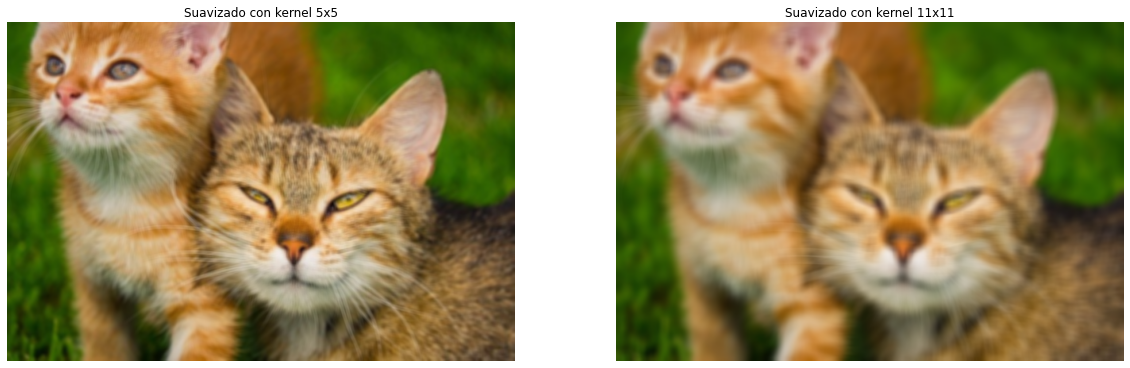

In [18]:
# Aplicamos o suavizado - kernel tamaño 5.
box_blur1 = cv2.blur(image, (5,5))

# Aplicamos o suavizado - kernel tamaño 11.
box_blur2 = cv2.blur(image, (11,11))

# Visualizamos.
plt.figure(figsize = (20, 10))
plt.subplot(121); plt.axis('off'); plt.imshow(box_blur1[:,:,::-1]); plt.title('Suavizado con kernel 5x5')
plt.subplot(122); plt.axis('off'); plt.imshow(box_blur2[:,:,::-1]); plt.title('Suavizado con kernel 11x11')

# 3. Suavizado Gaussiano

A diferenza do kernel da media, o núcleo gaussiano non é uniforme. O píxel medio obtén o peso máximo mentres que os píxeles máis afastados reciben menos peso. Un núcleo Gaussiano pesa a contribución de cada píxel veciño baseado nunha distribución gaussiana. 

Unha Gaussiana vén dada pola seguinte ecuación.
$$
G (x) = \frac {1} {\sqrt {2 \pi \sigma ^ 2}} \exp ^ {- \frac {x ^ 2} {2 \sigma ^ 2}}
$$
A forma da curva contrólase cun único parámetro chamado $ \sigma $ que controla o pico da curva de campá.
$$
G (x, \; y) = \frac {1} {2 \pi \sigma ^ 2} \exp ^ {- \frac {x ^ 2 \; + \; y ^ 2} {2 \sigma ^ 2} }
$$

O kernel gaussiano está baseado na mesma ecuación, excepto que está en 2D. No canto dunha curva, pódese pensar nunha campá ao revés. Un $ \sigma $ elevado crea un núcleo que se difumina máis.

O núcleo gaussiano 5x5 que se mostra a continuación é unha aproximación á distribución gaussiana 2D con $ {\sigma} = 1 $. Un valor alto de $ {\sigma} $ engadiría máis peso aos bordes do núcleo e, polo tanto, tería un efecto de desenfoque máis forte, mentres que un valor menor de $ {\sigma} $ restrinxiría o efecto de desenfoque (o tamaño do núcleo determina a cantidade de desenfoque). Un núcleo máis grande (co mesmo valor de sigma) emborronará a imaxe máis que un núcleo máis pequeno.


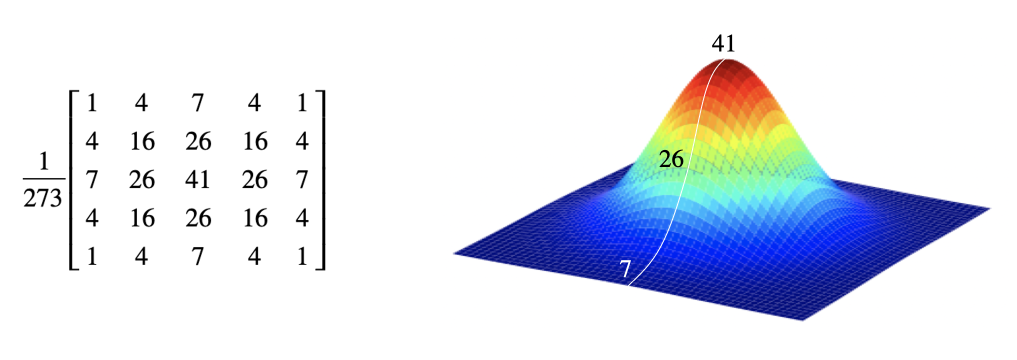


Unha imaxe suavizada cun núcleo gaussiano parece menos borrosa en comparación cun filtro da media do mesmo tamaño. Unha pequena cantidade de suavizado gaussiano emprégase frecuentemente para eliminar o ruído dunha imaxe. Tamén se aplica antes das operacións de filtrado de imaxes sensibles ao ruído. Por exemplo, o kernel de Sobel usado para calcular a derivada dunha imaxe mediante a combinación dun núcleo de Gauss e un núcleo de diferenza finita.

## 3.1 Suavizado Gaussian en OpenCV

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style = "color:rgb(8,133,37)">Sintaxe da Función</font>

```pythonTamaño do núcleo gaussiano. ksize.width e ksize.height poden diferir pero ambos deben ser positivos e impares. Ou poden ser cero e logo calcúlanse a partir de sigma.
dst = cv2.GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])
```

**`dst`**	imaxe de saída do mesmo tamaño e tipo que src.

A función ten **3 argumentos de entrada necesarios **:

1. **`src`**	imaxe de entrada; a imaxe pode ter calquera número de canles, que se procesan de forma independente, pero a profundidade debería ser CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
2. **`ksize`**	Tamaño do núcleo gaussiano. ksize.width e ksize.height poden diferir pero ambos deben ser positivos e impares. Ou poden ser cero e logo calcúlanse a partir da sigma aportada.
3. **`sigmaX`**	Desviación estándar do núcleo gaussiano en dirección X. Áchase como o seguinte compromiso:

$$Sigma = 0.3 * ((ksize - 1) * 0.5-1) + 0.8$$

Os argumentos opcionais inclúen:

- **`sigmaY`**	Desviación estándar da gaussiana na dirección Y; se sigmaY é cero, establécese igual a sigmaX, se os dous sigmas son ceros, calcúlanse a partir de ksize.width e ksize.height, respectivamente; para controlar completamente o resultado independentemente das posibles modificacións futuras na sintaxe da función, recoméndase especificar todos os ksize, sigmaX e sigmaY.



- **`borderType`**	método de extrapolación de píxeles no borde.(cv.BORDER_CONSTANT cv.BORDER_REPLICATE cv.BORDER_REFLECT cv.BORDER_WRAP cv.BORDER_REFLECT_101 cv.BORDER_TRANSPARENT cv.BORDER_REFLECT101 cv.BORDER_DEFAULT cv.BORDER_ISOLATED)



### <font style="color:rgb(8,133,37)">Documentación OpenCV</font>

[**`GaussianBlur()`**](https://docs.opencv.org/4.5.2/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

<hr style="border:none; height: 4px; background-color:#D3D3D3" />

### <font style="color:rgb(50,120,230)">Suavizado gaussino e efectos do tamaño do kernel</font>

Text(0.5, 1.0, 'Suavizado con kernel 11x11')

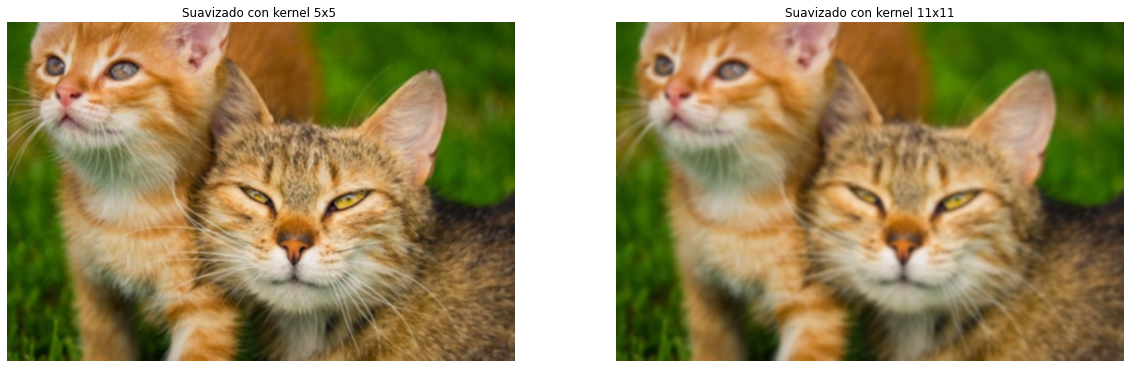

In [19]:
# Aplicamos suavizado gaussiano
gaussian_blur1 = cv2.GaussianBlur(image, (5,5), 0, 0)
gaussian_blur2 = cv2.GaussianBlur(image, (11,11), 0, 0)

# Visualizamos.
plt.figure(figsize = (20, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(gaussian_blur1[:,:,::-1]); plt.title('Suavizado con kernel 5x5 ')
plt.subplot(122); plt.axis('off'); plt.imshow(gaussian_blur2[:,:,::-1]); plt.title('Suavizado con kernel 11x11')

### <font style="color:rgb(50,120,230)">Comparando o suavizado da media e o gaussino</font>

Text(0.5, 1.0, 'uavizado da Media con kernel 11x11')

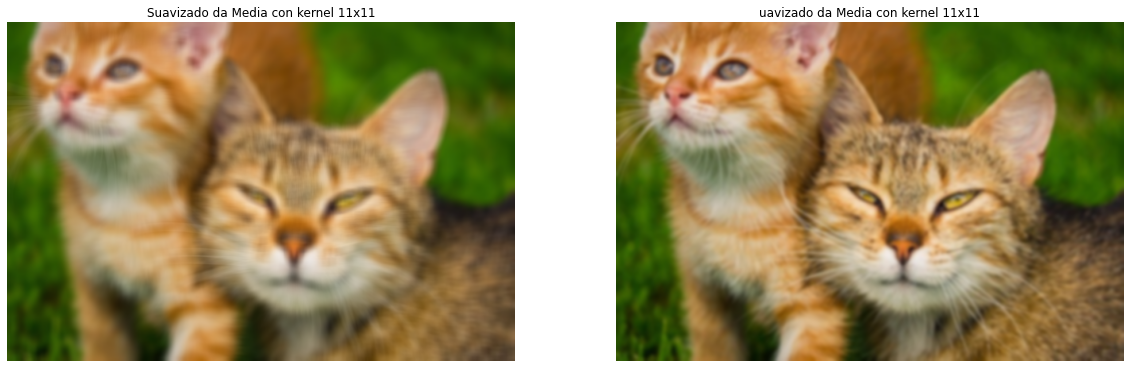

In [20]:
plt.figure(figsize = (20, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(box_blur2[:,:,::-1]);      plt.title('Suavizado da Media con kernel 11x11')
plt.subplot(122); plt.axis('off'); plt.imshow(gaussian_blur2[:,:,::-1]); plt.title('uavizado da Gaussiana con kernel 11x11')

### <font style="color:rgb(50,120,230)">Efecto da sigma no suavizado gaussino ${\sigma}$</font>

In [ ]:
# Especificamos sigmax = 0 e sigmay = 0, computamos unha sigma de 2 para un kernel de 11x11
gaussian_blur3 = cv2.GaussianBlur(image, (11,11), 0, 0) 
# Aqui especificamos os valores de sigma.
gaussian_blur4 = cv2.GaussianBlur(image, (11,11), 5, 5)

# Visualizamos.
plt.figure(figsize = (20, 8))
plt.subplot(121); plt.axis('off'); plt.imshow(gaussian_blur3[:,:,::-1]); plt.title('Suavizado Gaussiano, sigma = 2')
plt.subplot(122); plt.axis('off'); plt.imshow(gaussian_blur4[:,:,::-1]); plt.title('Suavizado Gaussiano, sigma = 5')

Text(0.5, 1.0, 'Suavizado Gaussiano, sigma = 5')

# 4. Filtrado de Nitidez

Podemos mellorar unha imaxe co seguinte núcleo de convolución 2D.

$$
\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}
$$


In [ ]:
saturn = cv2.imread('./data/saturn.jpg')
# Atopei a imaxe?
if saturn is None:  
    print("Non podo atopar a imaxe")

# Define a sharpening kernel.
kernel = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

saturn_sharp = cv2.filter2D(saturn, ddepth = -1, kernel = kernel)

plt.figure(figsize = (20, 15))
plt.subplot(121); plt.axis('off'); plt.imshow(saturn[:,:,::-1]);       plt.title('Imaxe de telescopi de Saturno')
plt.subplot(122); plt.axis('off'); plt.imshow(saturn_sharp[:,:,::-1]); plt.title('Desemborrodnado de Saturno')

### <font style="color:rgb(50,120,230)">Recuperando a nitidez dun suavizado gaussiano</font>

In [ ]:
image = cv2.imread('./data/kitten_zoom.png')
# Atopei a imaxe?
if image is None:  
    print("Non podo atopar a imaxe")

gaussian_blur = cv2.GaussianBlur(image, (11,11), 0, 0) 

# Kernel de nitidez.
kernel1 = np.array([[ 0, -1,  0],
                   [-1,  5, -1],
                   [ 0, -1,  0]])

# kernel de nitidez mais extremo!.
kernel2 = np.array([[0,  -4,  0],
                   [-4,  17, -4],
                   [ 0,  -4,  0]])

# Aplicamos a nitidez.
image_sharp1 = cv2.filter2D(gaussian_blur, ddepth = -1, kernel = kernel1)
image_sharp2 = cv2.filter2D(gaussian_blur, ddepth = -1, kernel = kernel2)

# Visualizamos.
plt.figure(figsize = (20,10))
plt.subplot(141); plt.axis('off'); plt.imshow(image[:,:,::-1]);         plt.title('Orixinal')
plt.subplot(142); plt.axis('off'); plt.imshow(gaussian_blur[:,:,::-1]); plt.title('Suavizado Gaussiano (11x11)')
plt.subplot(143); plt.axis('off'); plt.imshow(image_sharp1[:,:,::-1]);  plt.title('Nitidez')
plt.subplot(144); plt.axis('off'); plt.imshow(image_sharp2[:,:,::-1]);  plt.title('Máis Nitidez')

# <font style = "color: rgb (50,120,229)"> Filtro da mediana </font>

O filtrado de suavizado da mediana é unha técnica de filtrado non lineal (non podemos empregar a convolución!) que se usa máis comúnmente para eliminar o ruído **sal e pementa** das imaxes. Como o nome suxire, o ruído de sal e pementa aparece como píxeles brancos e negros que se producen de xeito aleatorio e son moi diferentes aos que os rodean. Nas imaxes en cor, o ruído de sal e pementa pode aparecer como pequenas manchas de cor aleatorias.

Na implementación de OpenCV do filtro da mediana úsase un kernel cadrado. A dimensión do cadrado debe ser un número enteiro impar maior que 1. Para unha imaxe, o filtro da mediana substitúe o valor do píxel central pola mediana de todos os píxeles dentro da área do núcleo. Como podes imaxinar, no filtrado da mediana, o valor filtrado en calquera píxel é un dos valores dos pixels na súa vecindde especificados polo núcleo.

Vexamos como o filtro da mediana elimina o ruído de sal e pementa. Considera un parche de 3x3 nunha imaxe en escala de grises:


$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 255 & 35\\
35 & 30 & 33
\end{bmatrix}
$$

Ten en conta que o valor do píxel central é moito maior que os dos veciños. É probable que o píxel central estea corrompido con ruído de sal e pementa.

**Se empregamos un filtro da media (ou caixa) para eliminar este ruído,** o píxel central será a media de todos os píxeles do vecindario 3x3. O valor do píxel central despois do filtrado da caixa será 

$$\frac{30 + 32 + 29 + 31 + 255 + 35 + 35 + 30 + 33}{9} = 57$$

$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 57 & 35\\
35 & 30 & 33
\end{bmatrix}
$$

Que é mellor ca antes, pero aínda así é alto en comparación cos píxeles veciños.

Agora, imos usar un filtro da mediana. Este toma só os valores dos píxeles veciños do píxel central, ordena a lista de valores e logo substitúe o valor do píxel central polo valor medio da lista ordenada. Neste caso, faise a lista ordenada

$$[29, 30, 30, 31, 32, 33, 35, 35, 255]$$

Así, o valor medio é 32 e substituímos o píxel central por 32. ¡Voila! O ruído desapareceu.

$$
\begin{bmatrix}
30 & 32 & 29\\
31 & 32 & 35\\
35 & 30 & 33
\end{bmatrix}
$$

Repítese para cada píxel da imaxe.


## <font style="color:rgb(50,120,229)">Filtro da mediana en OpenCV</font>

O filtro da mediana implemetase coa función [**`medianBlur`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga564869aa33e58769b4469101aac458f9) en OpenCV. O seu uso é directo. 

### <font style="color:rgb(8,133,37)">Sintaxe da función</font>

```python
dst	=	cv2.medianBlur(	src, ksize[, dst]	)
```

**Parameters**
- **`src`**	entrada de imaxe de 1, 3 ou 4 canles; cando ksize é 3 ou 5, a profundidade da imaxe debería ser CV_8U, CV_16U ou CV_32F, para tamaños de apertura maiores, só pode ser CV_8U.
- **`dst`**	matriz de destino do mesmo tamaño e tipo que src.
- **`ksize`**	tamaño lineal de apertura; debe ser impar e maior que 1, por exemplo: 3, 5,7, ...

É hora de ver isto en acción!


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "./data/salt-and-pepper.png"
img = cv2.imread(filename)
# Atopei a imaxe?
if img is None:  
    print("Non podo atopar a imaxe")

In [ ]:
# Definimos o tamaño do kernel
kernelSize = 5

#Realizamos o filtrado e o almacenamos en "medianBlurred"
medianBlurred = cv2.medianBlur(img,kernelSize)

# Visualizamos os resultados
plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Imaxe orixinal")
plt.subplot(122);plt.imshow(medianBlurred[...,::-1]);plt.title("Filtro da mediana : KernelSize = 5")

# <font style = "color: rgb (50,120,229)"> Filtrado bilateral </font>

Un **filtro bilateral** é unha operación de suavizado non lineal, que preserva os bordes e reduce o ruído. A maioría dos filtros de suavizado (por exemplo, un filtro Gauss ou da media) teñen un parámetro chamado $ \sigma_s $ (o s no subíndice significa "espacial") que determina a cantidade de alisado. Moitas veces este valor está intimamente relacionado co tamaño do kernel. Un filtro de suavizado típico substitúe o valor de intensidade dun píxel pola suma ponderada dos seus veciños. Canto maior sexa a vecindade, máis suave será a imaxe filtrada. O tamaño da vecindade é directamente proporcional ao parámetro $ \sigma_s $.

Nos filtros de preservación de bordes, hai dous obxectivos en competencia:

1. Suavizar a imaxe.

2. Non suavice os bordes / límites de cores.

Noutras palabras, se queremos preservar os bordes, non podemos simplemente substituír a cor dun píxel pola suma ponderada dos seus veciños.

Considere este parche de imaxe 3x3, que se mostra a continuación.

$$
\begin{bmatrix}
30 & 200 & 239\\
31 & 220 & 235\\
35 & 210 & 233
\end{bmatrix}
$$


Podes ver que os valores da columna esquerda son moi inferiores aos valores da columna central e da dereita. Polo tanto, este parche forma parte dun borde vertical. Nunha operación de filtrado típica, substituímos o píxel central por algunha combinación ponderada dos 9 píxeles neste vecindario de 3x3. Non obstante, neste caso, unha mellor idea é filtrar o píxel central baseado só nas columnas laterais central e dereita para que o borde se manteña e non se desenfoque.

No filtrado bilateral, ao calcular a contribución de calquera píxel á saída final, pesamos os píxeles máis próximos en termos da diferencia de intensidade respecto ao píxel central en comparación cos píxeles con diferencias de intensidades maiores. Queremos atopar un peso que dependa do cadrado da diferenza de intensidade $(I_p $ - $ I_q )^2 $ entre o píxel central `q` e o seu veciño `p`. Pero para ter máis control sobre a ponderación da diferenza de intensidade o mellor é redefinila como función gaussiana:

$$
G_{\sigma_r}(I_p-I_q)
$$

e controle o significado das diferenzas de intensidade usando o parámetro $ \sigma_r $.
 
Ademais, do mesmo xeito que o filtrado gaussiano, tamén queremos ponderar os píxeles máis próximos ao píxel central máis que os píxeles máis afastados. Entón, os pesos deberían depender de $ || p - q || $. Pero, de novo, é probable que descontrole a definición de distancia. Como o facemos? Ben, empregamos unha Gaussian $ G _{\sigma_ {s}} (|| p - q ||) $ que modula a distancia a través do parámetro $ \sigma_s $.

Combinando todo, un filtro bilateral dará un valor no píxel central q.

$$ O_q=\frac{1}{W}\sum_p G_{\sigma_s}(|| p - q ||)G_{\sigma_r}(|| I_p - I_q ||)$$

Onde,

$ W_p $ = A constante de normalización

$ G _{\sigma_{s}} $ = núcleo gaussiano espacial

$ G _{\sigma_{r}} $ = Núcleo gaussiano de cor / rango

q = píxel central

p = píxel veciño

$ I_p $ = Intensidade no píxel p

$ I_q $ = Intensidade no píxel q



Se os píxeles do vecindario son bordes, a diferenza de intensidade $ (I_p - I_q) $ será maior. Dado que a gaussiana é unha función decrecente, $ G _{\sigma_{r}} (I_p - I_q) $ terá pesos máis baixos para valores máis altos. Polo tanto, o efecto de suavizado será menor para estes píxeles, preservando os bordes.

Para concluír, para o filtrado bilateral, temos dous parámetros: $ \sigma_s $ e $ \sigma_r $. Do mesmo xeito que outros filtros de suavizado $ \sigma_s $ controla a cantidade de suavizado espacial e $ \sigma_r $ (para sigma_range) controla a media das cores diferentes na vecindade. Un $ \sigma_r $ máis alto resulta en rexións máis grandes de cor constante. Vexamos o código.

## <font style="color:rgb(50,120,229)">Filtro Bilateral en OpenCV</font>


En primeiro lugar, aquí está o [**`Filtro bilateral`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed) en OpenCV.

### <font style = "color: rgb (8,133,37)"> Sintaxe da función </font>

```python
dst	=	cv2.bilateralFilter(	src, d, sigmaColor, sigmaSpace[, dst[, borderType]]	)
```

**Parámetros**

- **`src`** Imaxe de entrada de 8 ou de punto flotante, 1 canle ou 3 canles.
- **`dst`** Imaxe de destino do mesmo tamaño e tipo que src.
- **`d`** Diámetro de cada vecindade de píxeles que se usa durante o filtrado. Se non é positivo, calcúlase a partir de `sigmaSpace`.
- **`sigmaColor`** Filtrar o sigma no espazo de cor. Un valor maior do parámetro significa que se mesturarán cores máis afastadas dentro da vecindade dos píxeles (ver sigmaSpace), o que resulta en áreas máis grandes de cor semigual.
- **`sigmaSpace`** Sigma para o filtrado no espazo de cor. Un valor maior do parámetro significa que os píxeles máis afastados influirán entre si sempre que as cores estean o suficientemente próximas (ver sigmaColor). Cando d> 0, especifica o tamaño do barrio independentemente de sigmaSpace. Se non, d é proporcional a sigmaSpace.
- **`borderType`** modo de borde usado para extrapolar píxeles fóra da imaxe.


### <font style="color:rgb(8,133,37)">Documentación OpenCV</font>

[**`bilateralFilter()`**](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#ga9d7064d478c95d60003cf839430737ed)


<hr style="border:none; height: 4px; background-color:#D3D3D3" />


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
img = cv2.imread("./data/gaussian-noise.png")

# Atopei a imaxe?
if img is None:  
    print("Non podo atopar a imaxe")

Primeiro, especificamos os parámetros empregados no filtro bilateral. O primeiro que especificamos é o diámetro da vecindade de píxeles que usaremos para filtrar. A continuación especificamos as desviacións estándar no espazo de cores e no espazo de coordenadas. A imaxe filtrada almacénase na matriz numpy 'bilateralFiltered'.

In [ ]:
# diametro da vecindade empregado no filtrado
dia=15;

# Sigma no espazo de cores. Valores altos produce parches de cores semi-iguais
# dado que permite a influencia de cor dos pixeles alonxados do central
sigmaColor=80

# Sigma no espazo euclidiano. Valores altos permiten a influencia de píxeles máis alonxados do centro
sigmaSpace=80


#Filtramos
result = cv2.bilateralFilter(img, dia, sigmaColor, sigmaSpace)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(img[...,::-1]);plt.title("Imaxe orixinal")
plt.subplot(122);plt.imshow(result[...,::-1]);plt.title("Resultado do filtrado bilateral")

### <font style = "color: rgb (8,133,37)"> Exercicio 1: enredando cos kernels </font>
Proba a definir distintos kernels e ver a súa influencia na saída. Por exemplo,

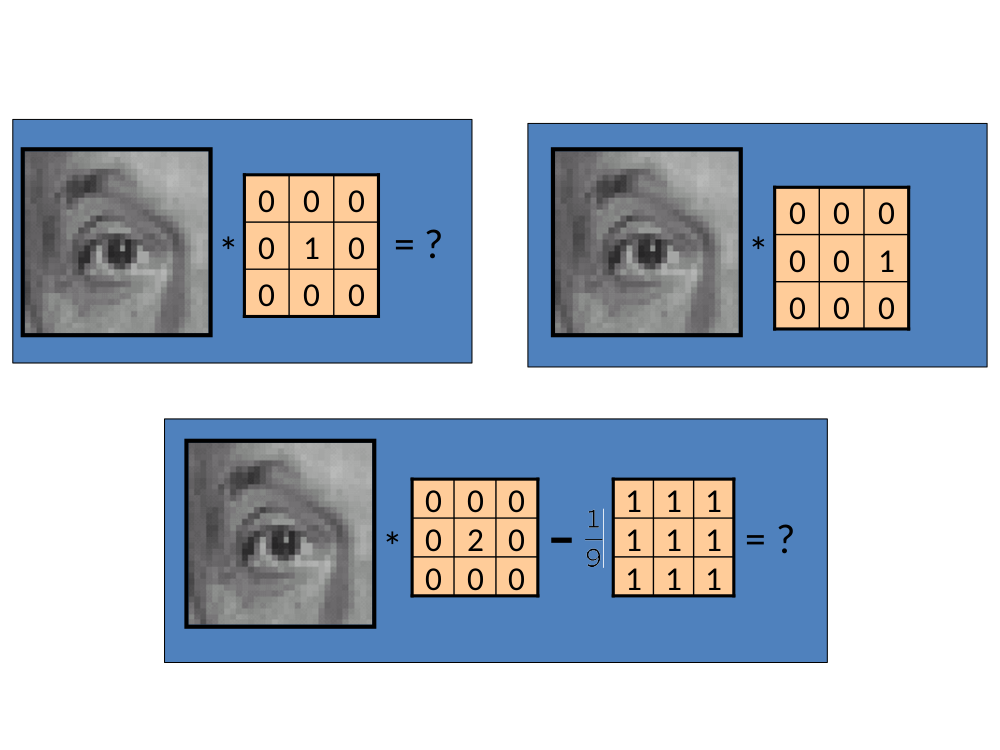



1. Proba sen normalizar os valores por `# elementos`
2. Proba a cambiar os valores do kernel e observa se á saída obtida é o que esperabas cando deseñaches o kernel.
3. Dado a a derivada é unha operación lineal, proba a definir un kernel que implemente esta operación mediante diferencias finitas,
$$\frac{\partial I}{\partial x} \simeq I(x+1,y) - I(x,y)$$

### <font style = "color: rgb (8,133,37)"> Exercicio 2. </font>
Apliqca o filtro da media, con dous kernels de tamaños 3 e 7, mediante a función "blur" de OpenCV. Visualiza os resultados

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

filename = "./data/gaussian-noise.png"

# Cargamos a imaxe
#PON O CODIGO AQUI
# Aplicamos o filtro da media - kernel  3
#PON O CODIGO AQUI
#dst =
# AAplicamos o filtro da media - kernel 7
#PON O CODIGO AQUI
#dst2= 

#plt.figure(figsize=[20,10])
#plt.subplot(131);plt.imshow(img[...,::-1]);plt.title("Orixinal")
#plt.subplot(132);plt.imshow(dst1[...,::-1]);plt.title("Filtro media 1 : KernelSize = 3")
#plt.subplot(133);plt.imshow(dst2[...,::-1]);plt.title("Filtro media : KernelSize = 7")

### <font style = "color: rgb (8,133,37)"> Exercicio 3. </font>

Realiza unha comparación, para unha imaxe con diferentes condicións de ruído, o resultado obtido cun filtro Bilateral vs filtro da Mediana. 